# ðŸ“Š ETL with CSV and DataFrames in Python
---


By the end, you'll be able to:
- Understand CSV structures
- Load data into pandas DataFrames
- Clean and transform data
- Aggregate and analyze information
- Save cleaned datasets back to CSV
- Build a mini ETL pipeline

Let's begin! ðŸš€

## 1. Introduction to CSVs & DataFrames
**CSV (Comma-Separated Values)** is one of the simplest and most widely used data formats. Each line is a row, and commas separate the values.

Example:
```csv
Name,Age,City
Alice,25,NY
Bob,30,LA
```

A **DataFrame** in pandas is like an Excel sheet or SQL table in memory.

In [1]:
import pandas as pd

# Load a sample CSV
students = pd.read_csv('/content/students.csv')
students.head()

Name   Age     City
0    Alice  25.0       NY
1      Bob   NaN       LA
2  Charlie  35.0  Chicago
3    Diana  40.0  Houston
4      Eve   NaN       NY

## 2. Reading & Inspecting CSVs
The `pd.read_csv()` function is extremely flexible. We can specify delimiters, encodings, column selections, and row limits.

Let's explore:

In [2]:
# Basic inspection
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Name    6 non-null      object 
 1   Age     4 non-null      float64
 2   City    6 non-null      object 
dtypes: float64(1), object(2)
memory usage: 276.0+ bytes


In [3]:
# Summary statistics
students.describe(include='all')

Name    Age City
count       6   4.00    6
unique      5    NaN    4
top     Alice    NaN   NY
freq        2    NaN    3
mean      NaN  31.25  NaN
std       NaN   7.50  NaN
min       NaN  25.00  NaN
25%       NaN  25.00  NaN
50%       NaN  30.00  NaN
75%       NaN  36.25  NaN
max       NaN  40.00  NaN

ðŸ‘‰ **Challenge:** Load only the first 3 rows of the `students.csv` file using `nrows`.

In [7]:
# Load the first 3 rows
students_3 = pd.read_csv('/content/students.csv', nrows=3)
students_3

Name   Age     City
0    Alice  25.0       NY
1      Bob   NaN       LA
2  Charlie  35.0  Chicago

## 3. Cleaning & Transforming Data
Real-world data is messy. Common tasks:
- Handling missing values
- Fixing data types
- Renaming columns
- Removing duplicates

In [8]:
# Handle missing values
students['Age'].fillna(students['Age'].mean(), inplace=True)

# Remove duplicates
students.drop_duplicates(inplace=True)

# Rename columns
students.rename(columns={'Name':'StudentName'}, inplace=True)

students.head()

/tmp/ipython-input-2829192070.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  students['Age'].fillna(students['Age'].mean(), inplace=True)


StudentName    Age     City
0       Alice  25.00       NY
1         Bob  31.25       LA
2     Charlie  35.00  Chicago
3       Diana  40.00  Houston
4         Eve  31.25       NY

ðŸ‘‰ **Challenge:** Ensure the `City` column has consistent naming (e.g., replace `NY` with `New York`).

In [9]:
# Normalize whitespace and case
students['City'] = (
    students['City']
    .astype(str)        # in case there are NaNs
    .str.strip()
    .str.replace(r'\s+', ' ', regex=True)
    .str.title()        # "new york" -> "New York"
)

# Expand abbreviations
city_map = {
    'Ny': 'New York', 'N.Y.': 'New York', 'Nyc': 'New York', 'Ny, Usa': 'New York',
    'La': 'Los Angeles', 'L.A.': 'Los Angeles',
    'Sf': 'San Francisco', 'S.F.': 'San Francisco',
    'Dc': 'Washington', 'D.C.': 'Washington'
}
students['City'] = students['City'].replace(city_map)

# Check unique values after cleaning
sorted(students['City'].dropna().unique().tolist())[:20]


['Chicago', 'Houston', 'Los Angeles', 'New York']

## 4. Enrichment & Feature Engineering
We often add new columns to enrich data.

Example: Add an **Age Bracket** column.

In [10]:
def age_bracket(age):
    if age < 18:
        return 'Youth'
    elif age < 40:
        return 'Adult'
    else:
        return 'Senior'

students['AgeBracket'] = students['Age'].apply(age_bracket)
students.head()

StudentName    Age         City AgeBracket
0       Alice  25.00     New York      Adult
1         Bob  31.25  Los Angeles      Adult
2     Charlie  35.00      Chicago      Adult
3       Diana  40.00      Houston     Senior
4         Eve  31.25     New York      Adult

## 5. Aggregation & Grouping
We can summarize data using `groupby`.

In [11]:
students.groupby('City')['Age'].mean()

City
Chicago        35.000
Houston        40.000
Los Angeles    31.250
New York       28.125
Name: Age, dtype: float64

ðŸ‘‰ **Challenge:** Count how many students are in each Age Bracket.

In [15]:
# Count students in each AgeBracket
age_bracket_counts = students['AgeBracket'].value_counts(dropna=False).rename_axis('AgeBracket').reset_index(name='Count')
age_bracket_counts

AgeBracket  Count
0      Adult      4
1     Senior      1

## 6. Visualization
Pandas integrates with matplotlib to quickly visualize data.

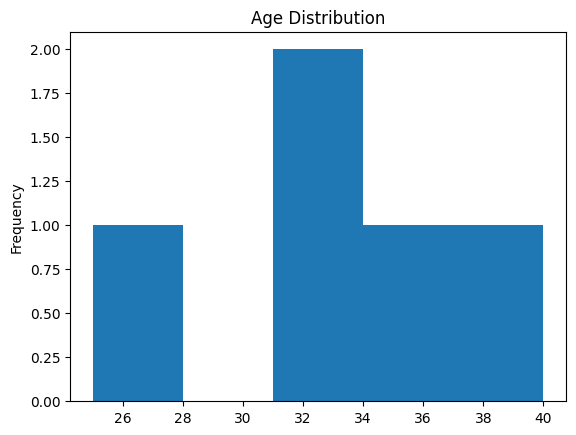

In [12]:
import matplotlib.pyplot as plt

students['Age'].plot(kind='hist', bins=5, title='Age Distribution')
plt.show()

## 7. Writing CSVs
After cleaning, we can save back to CSV.

Use `index=False` to avoid saving row numbers.

In [13]:
students.to_csv('students_clean.csv', index=False)

## 8.  Mini-Project: Sales Data ETL
Now, letâ€™s put everything together using a sales dataset (`sales.csv`).

### Steps:
1. Load the CSV
2. Clean and transform
3. Create a new column (Revenue)
4. Aggregate to find top products
5. Visualize revenue over time
6. Save cleaned data

In [16]:
# Load sales data
sales = pd.read_csv('/content/sales.csv')
sales.head()

Date Product  Units  Price
0  2025-01-01   Apple     10   0.50
1  2025-01-02  Banana      8   0.25
2  2025-01-02   Apple     15   0.50
3  2025-01-03  Orange     12   0.75
4  2025-01-04  Banana     20   0.25

In [17]:
# Add a Revenue column
sales['Revenue'] = sales['Units'] * sales['Price']
sales.head()

Date Product  Units  Price  Revenue
0  2025-01-01   Apple     10   0.50      5.0
1  2025-01-02  Banana      8   0.25      2.0
2  2025-01-02   Apple     15   0.50      7.5
3  2025-01-03  Orange     12   0.75      9.0
4  2025-01-04  Banana     20   0.25      5.0

In [18]:
# Aggregate: total revenue by product
sales.groupby('Product')['Revenue'].sum().sort_values(ascending=False)

Product
Apple     12.5
Orange     9.0
Banana     7.0
Name: Revenue, dtype: float64

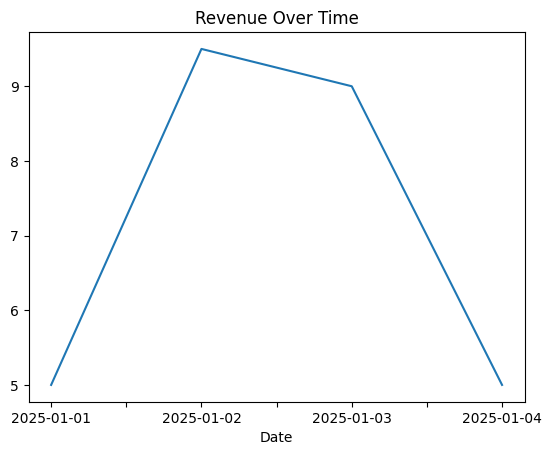

In [19]:
# Revenue over time
sales.groupby('Date')['Revenue'].sum().plot(kind='line', title='Revenue Over Time')
plt.show()

In [21]:
# Save clean version
sales.to_csv('sales_clean.csv', index=False)

ðŸ‘‰ ** Challenge:**
- Find the top 3 days by revenue.
- Compute average revenue per product.
- Export results to a new CSV file (`sales_report.csv`).

In [22]:
# Top 3 days by revenue
rev_by_day = (
    sales.groupby('Date', dropna=False)['Revenue']
    .sum()
    .sort_values(ascending=False)
)
top3_days = rev_by_day.head(3).reset_index().rename(columns={'Revenue': 'TotalRevenue'})
top3_days

Date  TotalRevenue
0  2025-01-02           9.5
1  2025-01-03           9.0
2  2025-01-01           5.0

In [23]:
# Average revenue per product
avg_rev_per_product = (
    sales.groupby('Product', dropna=False)['Revenue']
    .mean()
    .sort_values(ascending=False)
    .reset_index()
    .rename(columns={'Revenue': 'AvgRevenue'})
)
avg_rev_per_product

Product  AvgRevenue
0  Orange        9.00
1   Apple        6.25
2  Banana        3.50

In [24]:
# Export results to one CSV
report_top_days = top3_days.copy()
report_top_days['Metric'] = 'TopDayRevenue'
report_top_days = report_top_days.rename(columns={'Date': 'Key', 'TotalRevenue': 'Value'})[['Metric', 'Key', 'Value']]

report_avg_prod = avg_rev_per_product.copy()
report_avg_prod['Metric'] = 'AvgRevenuePerProduct'
report_avg_prod = report_avg_prod.rename(columns={'Product': 'Key', 'AvgRevenue': 'Value'})[['Metric', 'Key', 'Value']]

sales_report = pd.concat([report_top_days, report_avg_prod], ignore_index=True)
sales_report.to_csv('sales_report.csv', index=False)

sales_report.head(10)

Metric         Key  Value
0         TopDayRevenue  2025-01-02   9.50
1         TopDayRevenue  2025-01-03   9.00
2         TopDayRevenue  2025-01-01   5.00
3  AvgRevenuePerProduct      Orange   9.00
4  AvgRevenuePerProduct       Apple   6.25
5  AvgRevenuePerProduct      Banana   3.50